# Importations

In [343]:
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode
import numpy as np
import seaborn as sns
from math import sqrt, pi
from collections import Counter
from POLIST_03_fonctions import *
import re
import shapefile as shp
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
pd.options.display.max_columns = 200

On commence par charger nos bases de données.

In [344]:
pattern = "data/olist_%s_dataset.csv"
data_customers = pd.read_csv(pattern % "customers")
data_location = pd.read_csv(pattern % "geolocation")
data_items = pd.read_csv(pattern % "order_items")
data_payments = pd.read_csv(pattern % "order_payments")
data_reviews = pd.read_csv(pattern % "order_reviews")
data_orders = pd.read_csv(pattern % "orders")
data_products = pd.read_csv(pattern % "products")
data_sellers = pd.read_csv(pattern % "sellers")
data_categories = pd.read_csv("data/product_category_name_translation.csv")
dataframes = [data_customers, data_location, data_items, data_payments,
              data_reviews, data_orders, data_products, data_sellers, data_categories]


On charge également des bases de données complémentaires (indacteurs socioéconomiques, démographiques...) et des fichiers utiles, commes les shapefiles.

In [345]:
# Chargement des shapefiles
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))
shp_file_brazil = shp.Reader("./shapefiles/bra_adm_ibge_2020_shp/bra_admbnda_adm0_ibge_2020.shp")
shp_file_states = shp.Reader("./shapefiles/bra_adm_ibge_2020_shp/bra_admbnda_adm1_ibge_2020.shp")

# Introduction aux bases de données

Voici les descriptions des tables disponibles:
- **data_customers**: Table des identifiants des clients avec leurs adresses postales
- **data_location**: Table des positions géographiques, avec les codes postaux associés
- **data_items**: Table des achats (nom du produit, prix...)
- **data_payments**: Table des paiement (Type de paiement, en combien de fois...)
- **data_reviews**: Table des avis clients pour chaque commande
- **data_product**: Table des produits (nom, catégorie, dimensions)
- **data_categories**: Table des catégories avec leurs traductions en anglais.

## data_customers

In [346]:
data_customers.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## data_location

In [347]:
data_location.head()


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## data_items

In [348]:
data_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## data_payments

In [349]:
data_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


## data_reviews

In [350]:
data_reviews.head()


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


## data_orders

In [351]:
data_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## data_products

In [352]:
data_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## data_sellers

In [353]:
data_sellers.head()


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## data_categories

In [354]:
data_categories.head()


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Ordres de grandeurs

In [355]:
print("Il y à %d clients" % len(data_customers))
print("%d commandes ont été passées, dont %d ont été évaluées par le client" % (len(data_orders), len(data_reviews)))
orders_features = data_items.groupby('order_id').agg({'product_id': 'count', 'price':'sum'})
print("Le panier moyen contient %d produit(s) et vaut %.2f€" % (round(orders_features['product_id'].mean()), orders_features['price'].mean()))
print("Il y à %d produits dans le catalogue, répartis dans %d catégories" % (len(data_products), len(data_categories)))
print("%d vendeurs proposents ces produits" % len(data_sellers))

Il y à 99441 clients
99441 commandes ont été passées, dont 99224 ont été évaluées par le client
Le panier moyen contient 1 produit(s) et vaut 137.75€
Il y à 32951 produits dans le catalogue, répartis dans 71 catégories
3095 vendeurs proposents ces produits


# Doublons

In [356]:
key_cols = [['customer_id'], ["geolocation_lat", "geolocation_lng"],
            ['order_id', 'product_id', 'order_item_id'], 
            ['order_id', 'payment_sequential'],
            ['order_id'], ['order_id'], ['product_id'],
            ['seller_id'], ['product_category_name']]
dataframe_names = [x for x in globals().keys() if re.match("data_.*", x)]
for (dataframe, key_subset, dataframe_name) in zip(dataframes, key_cols, dataframe_names):
    drop_duplicates(dataframe, key_subset, dataframe_name)

0 doublons ont été repérés dans data_customers
281700 doublons ont été repérés dans data_location
0 doublons ont été repérés dans data_items
0 doublons ont été repérés dans data_payments
551 doublons ont été repérés dans data_reviews
0 doublons ont été repérés dans data_orders
0 doublons ont été repérés dans data_products
0 doublons ont été repérés dans data_sellers
0 doublons ont été repérés dans data_categories


# Valeurs aberrantes

## data_location

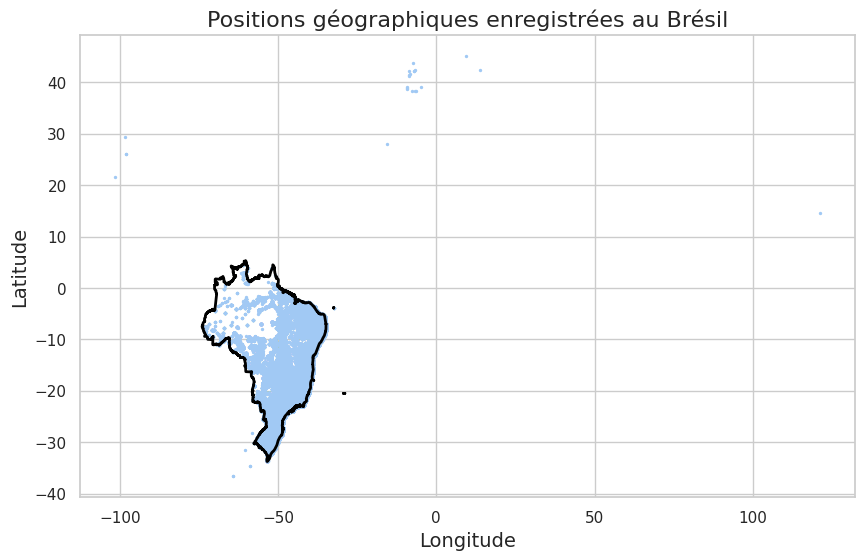

In [357]:
ax = plt.axes()
plot_shape(shp_file_brazil, 0, ax)
ax.scatter(data_location['geolocation_lng'],
            data_location['geolocation_lat'], s=2)
ax.set_xlabel("Longitude", fontsize=14)
ax.set_ylabel("Latitude", fontsize=14)
_ = plt.title("Positions géographiques enregistrées au Brésil", fontsize=16)

In [358]:
# len_data: Enregistre de le nombre de localisations disponibles
points_brazil = shp_file_brazil.shape(0).points
x_coords, y_coords = [point[0] for point in points_brazil], [point[1] for point in points_brazil]
len_data = len(data_location)
data_location = data_location[data_location['geolocation_lat'] >= min(y_coords)]
data_location = data_location[data_location['geolocation_lat'] <= max(y_coords)]
data_location = data_location[data_location['geolocation_lng'] <= max(x_coords)]
data_location = data_location[data_location['geolocation_lng'] >= min(x_coords)]
print("On a supprimé %d positions en dehors du Brésil" %
      (len_data-len(data_location)))


On a supprimé 27 positions en dehors du Brésil


**On corrige les éventuelles erreurs de formattage** pour le nom de la ville:

In [359]:
data_location['geolocation_city'] = data_location['geolocation_city'].str.lower()
data_location['geolocation_city'] = data_location['geolocation_city'].map(
    unidecode)


Pour la variable 'geolocation_state':

In [360]:
# states: Listes des États trouvés dans les localisations
states = data_location['geolocation_state'].unique()
print("Il y à %d États au Brésil et les voici:\n%s" % (len(states), states))


Il y à 27 États au Brésil et les voici:
['SP' 'RN' 'RJ' 'AC' 'ES' 'MG' 'BA' 'SE' 'PE' 'AL' 'PB' 'CE' 'PI' 'MA'
 'PA' 'AP' 'AM' 'RR' 'DF' 'GO' 'RO' 'TO' 'MT' 'MS' 'RS' 'PR' 'SC']


On associe à chaque code ZIP une position géographique

In [361]:
data_location_zip = data_location.groupby('geolocation_zip_code_prefix').agg({'geolocation_lat': 'mean', 'geolocation_lng':'mean'})
data_location_zip.head()

,geolocation_lat,geolocation_lng
geolocation_zip_code_prefix,,
1001,-23.550271,-46.634047
1002,-23.547657,-46.634991
1003,-23.548991,-46.635653
1004,-23.549829,-46.634792
1005,-23.549487,-46.636650


## data_categories

On corrige les éventuelles **erreurs de formattage**

In [362]:
# On caste les noms de catégories en string
data_categories['product_category_name'] = data_categories['product_category_name'].astype(
    str)
# On uniformise la casse
data_categories['product_category_name'] = data_categories['product_category_name'].str.lower()
# On supprime les caractères accentués
data_categories['product_category_name'] = data_categories['product_category_name'].map(
    unidecode)


## data_items

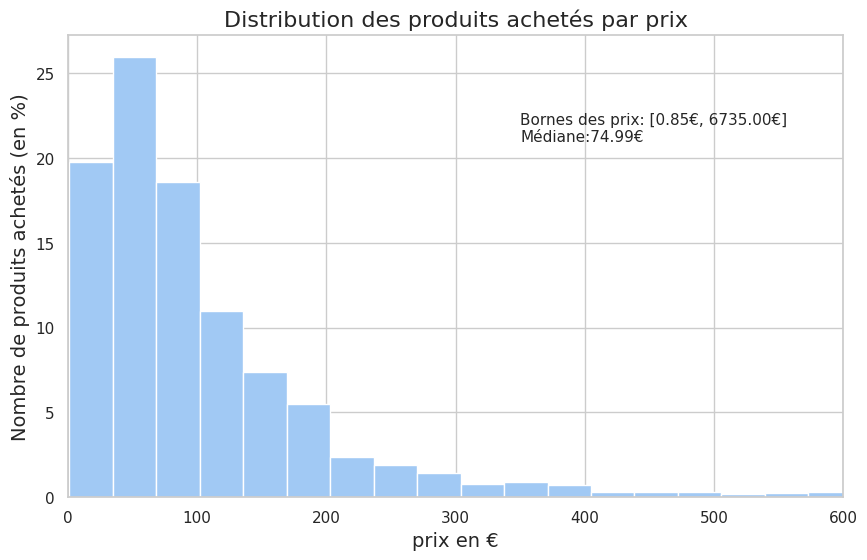

In [363]:
hist, bins = np.histogram(data_items['price'], bins=200)
bins = [bins[i-1]+(bins[i]-bins[i-1])/2 for i in range(1, len(bins))]
plt.bar(bins, 100*hist/hist.sum(), width=(bins[1]-bins[0]))
plt.xlim(0, 600)
plt.title("Distribution des produits achetés par prix", fontsize=16)
plt.ylabel("Nombre de produits achetés (en %)", fontsize=14)
plt.xlabel("prix en €", fontsize=14)
plt.text(350, 22, "Bornes des prix: [%.2f€, %.2f€]" % (min(data_items['price']), max(data_items['price'])), fontsize=11)
_ = plt.text(350, 21, "Médiane:%.2f€" % data_items['price'].median(), fontsize=11)


Dans les produits achetés, les prix sont raisonnables (entre 1 et 7000€), avec un mode autour de 100€.

## data_payments

In [364]:
# price_order: Prix de chaque commande
price_order = data_items.groupby('order_id').agg({'price':'sum', 'freight_value':'sum'})
price_order = price_order.sum(axis=1)
# payment_order: Montant total payé par commande
payment_order = data_payments.groupby('order_id').agg({'payment_value':'sum'})['payment_value']
# unpaid_orders: Commandes impayées
unpaid_orders = price_order.index.difference(payment_order.index)
# paid_orders_unknown: Commandes payées dont les produits sont inconnus
paid_orders_unknown = payment_order.index.difference(price_order.index)
print("%d commande(s) payée(s) dont ont ne connait pas le contenu" % len(paid_orders_unknown))
print("%d commande(s) impayée(s)" % len(unpaid_orders))

775 commande(s) payée(s) dont ont ne connait pas le contenu
1 commande(s) impayée(s)


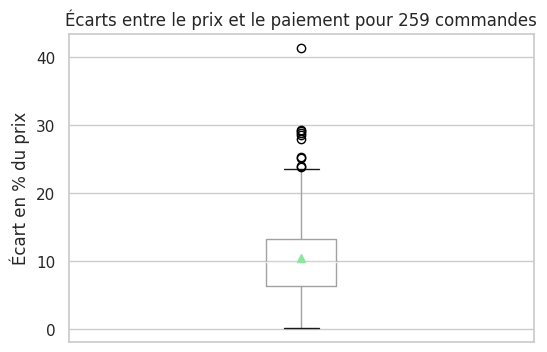

In [365]:
# price_payment: Contient le prix d'une commande et la somme totale versée en contre-partie
price_payment = price_order.to_frame('price').join(
    payment_order.to_frame(), how='inner').round()
# abberant_payments: Paiements avec des écarts
abberant_payments = price_payment[price_payment['price']
                                  != price_payment['payment_value']]
ecart_percent = (abberant_payments['price']-abberant_payments['payment_value']).abs()/abberant_payments['price']*100
plt.figure(figsize=(6, 4))
ecart_percent.to_frame().boxplot(showmeans=True)
plt.xticks([])
plt.title("Écarts entre le prix et le paiement pour %d commandes" % len(abberant_payments))
_ = plt.ylabel("Écart en % du prix")

## data_reviews

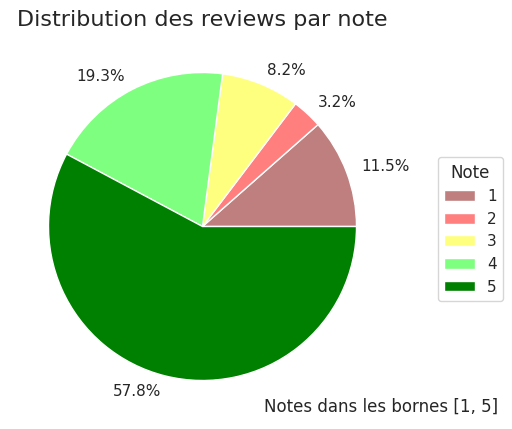

In [366]:
hist, bins = np.histogram(data_reviews['review_score'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
effectifs_notes = 100*hist/hist.sum()
opac = 0.5
colors = [(0.5,0,0,opac), (1,0,0,opac), (1,1,0, opac), (0, 1, 0,opac), (0,0.5,0)]
plt.figure(figsize=(5, 5))
plt.pie(effectifs_notes, labels=["%.1f"%p+'%' for p in effectifs_notes], colors=colors)
plt.title("Distribution des reviews par note", fontsize=16)
plt.legend([1, 2, 3, 4, 5], title="Note", loc='best', bbox_to_anchor=(1.3, 0.7))
_ = plt.text(0.4, -1.2, "Notes dans les bornes [%d, %d]" % (data_reviews['review_score'].min(), data_reviews['review_score'].max()))

## data_orders

Les seules données qu'on utilise dans cette table sont les associations entre commande et client. Pour celles-ci, on ne peut corriger les erreurs. **On ne modifie donc pas la base de données**.

## data_products

Voyons **si les catégories des produits sont présentes dans la liste des catégories**.

In [367]:
# On caste les noms de catégories en string
data_products['product_category_name'] = data_products['product_category_name'].astype(
    str).copy()
# On uniformise la casse
data_products['product_category_name'] = data_products['product_category_name'].str.lower().copy()
# On supprime les caractères accentués
data_products['product_category_name'] = data_products['product_category_name'].map(
    unidecode).copy()
# products_categories: Liste des catégories utilisées pour les produits
products_categories = data_products['product_category_name'].unique()
# unreferenced: Catégories sans référence dans la table des catégories
unreferenced = np.setdiff1d(
    products_categories, data_categories['product_category_name'].to_numpy())
print("Catégories de produits non-référencées dans la table des catégories:\n%s" % unreferenced)


Catégories de produits non-référencées dans la table des catégories:
['nan' 'pc_gamer' 'portateis_cozinha_e_preparadores_de_alimentos']


On observe qu'**on peut remplacer ces catégories non-référencées**:
- 'pc_gamer' par 'pcs'
- 'portateis_cozinha_e_preparadores_de_alimentos' par 'portateis_casa_forno_e_cafe'.

In [368]:
data_products['product_category_name'].replace('pc_gamer', 'pcs', inplace=True)
data_products['product_category_name'].replace(
    'portateis_cozinha_e_preparadores_de_alimentos', 'portateis_casa_forno_e_cafe', inplace=True)


# Valeurs manquantes

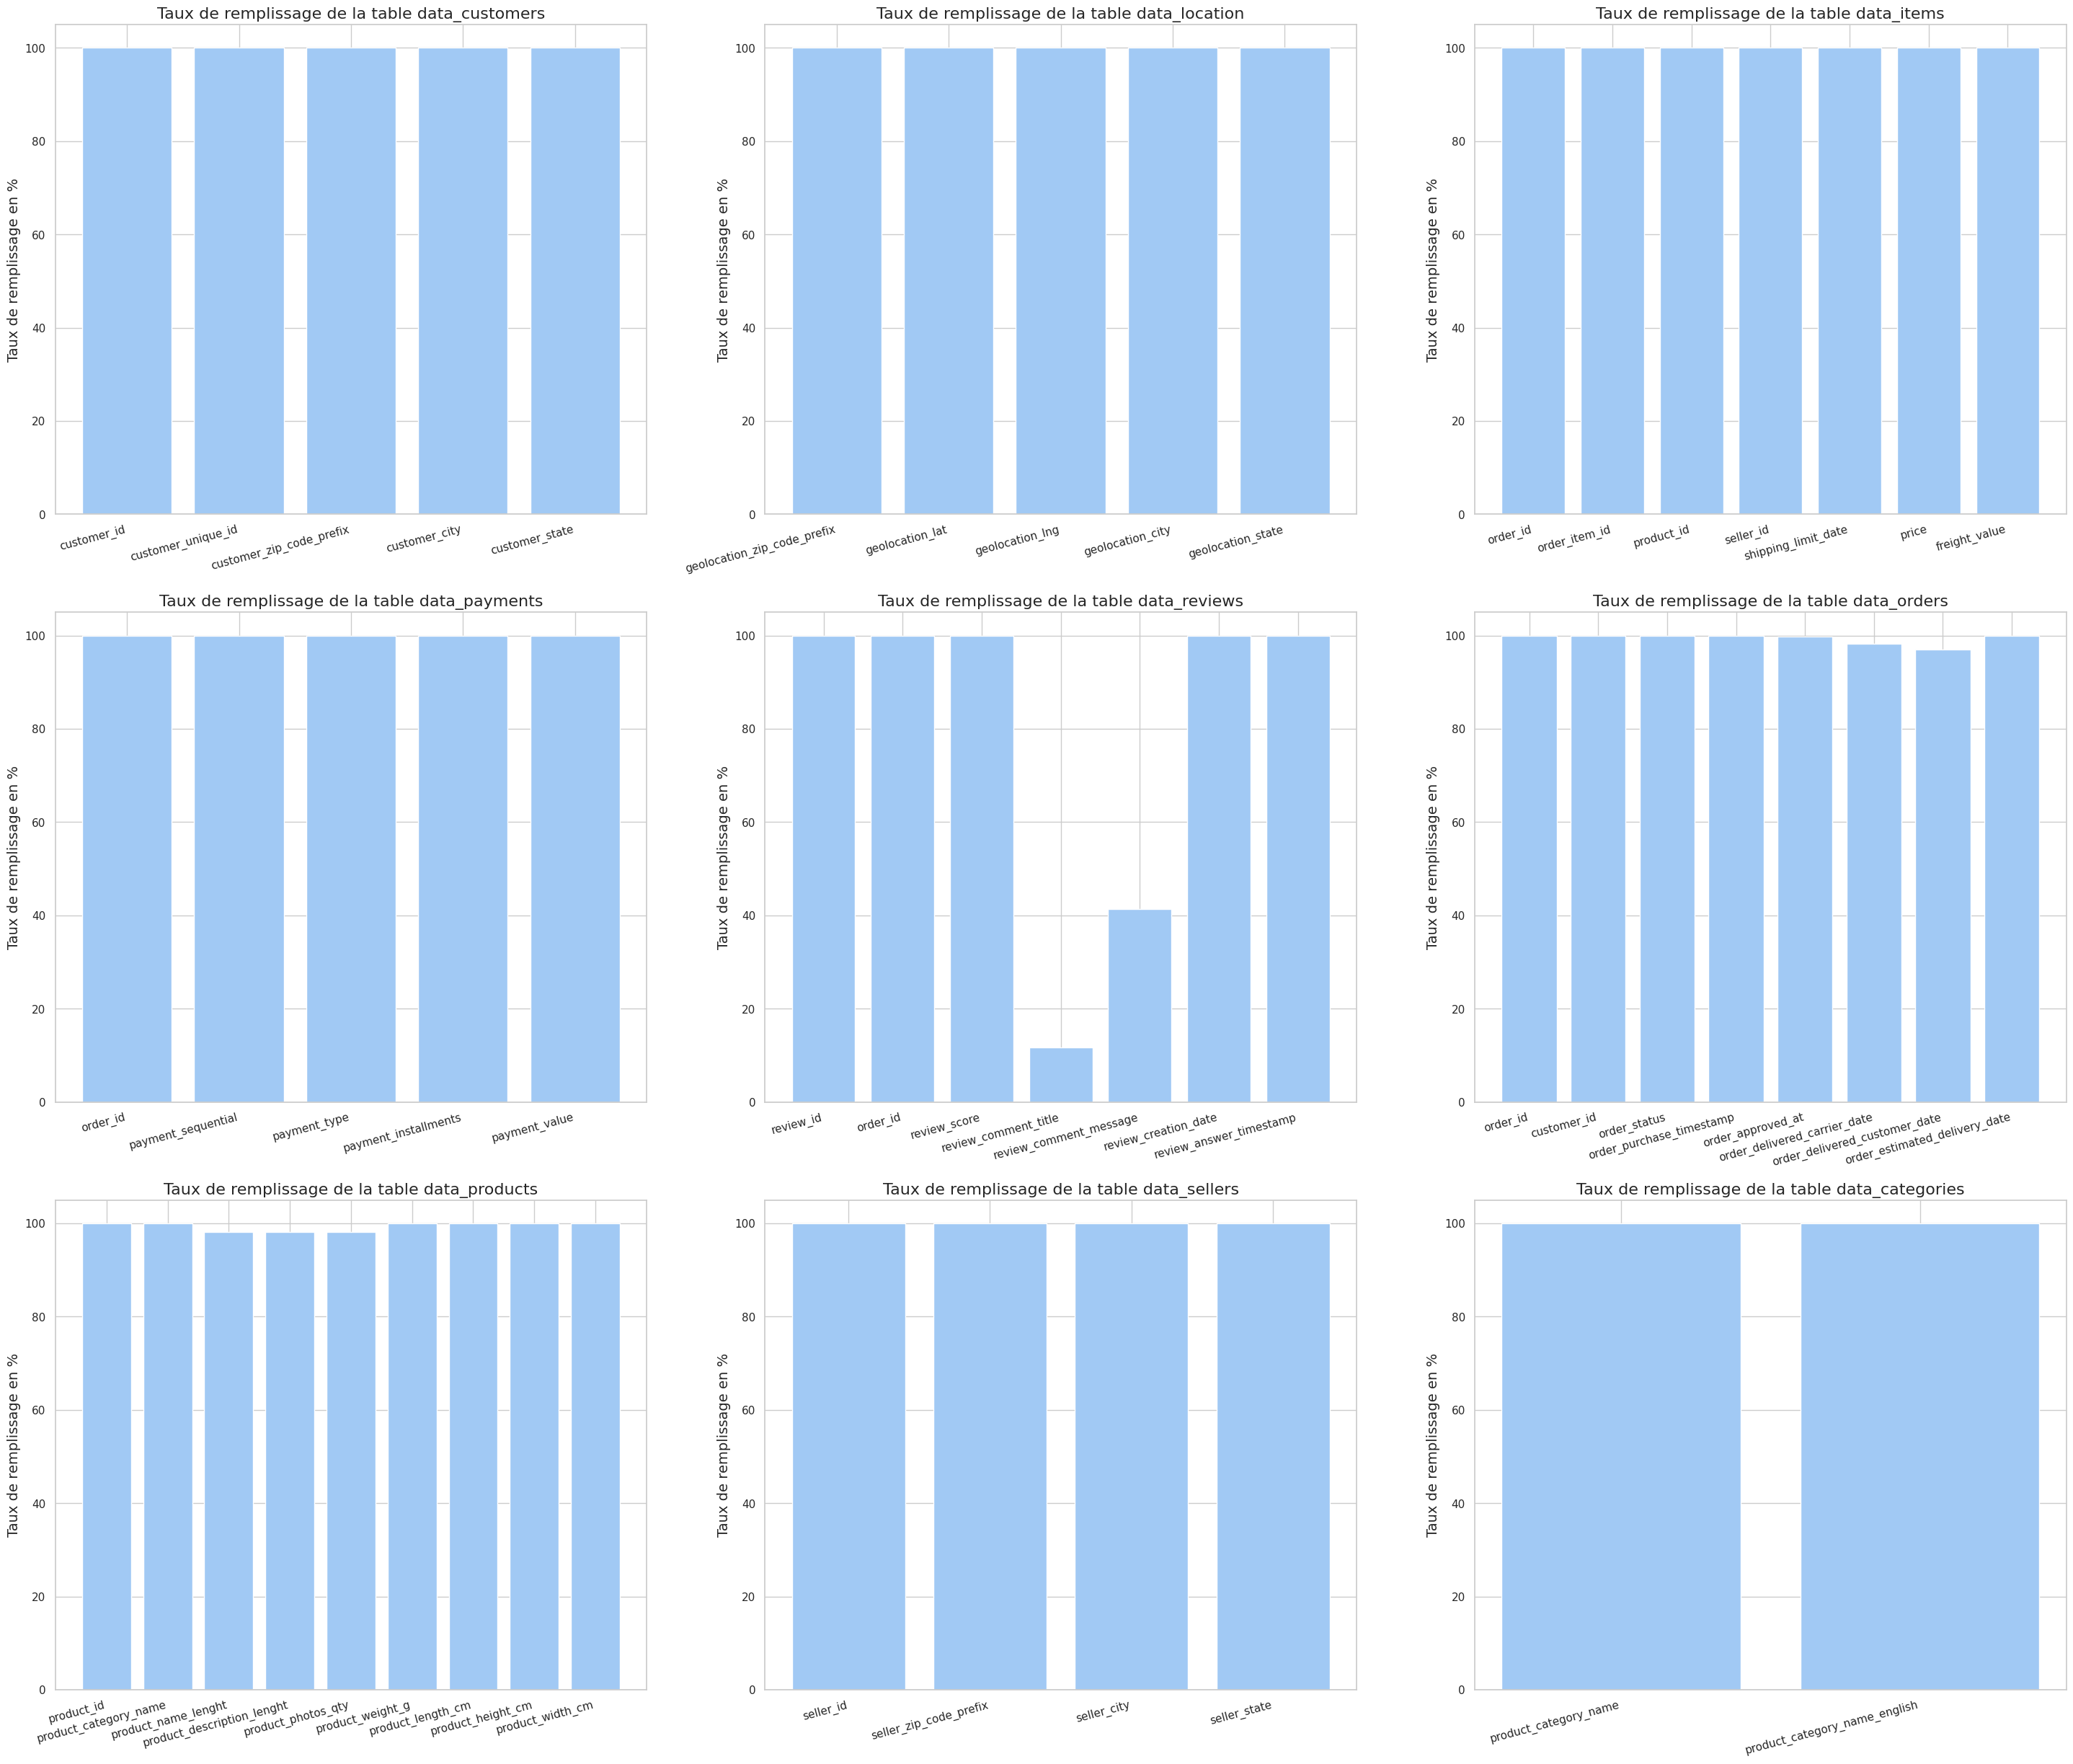

In [369]:
fig, axs = plt.subplots(3, 3, figsize=(12*3, 10*3))

for (ind, df) in enumerate(dataframes):
    filling_rate = 100*df.count()/len(df)
    i, j = ind//3, ind%3
    axs[i, j].set_xticks(np.arange(len(filling_rate)), rotation=25)
    axs[i, j].set_xticklabels(filling_rate.index, rotation=15, ha='right')
    axs[i, j].bar(filling_rate.index, filling_rate)
    axs[i, j].set_title("Taux de remplissage de la table %s" % dataframe_names[ind], fontsize=16)
    axs[i, j].set_ylabel("Taux de remplissage en %", fontsize=14)

Taux de remplissage pour chaque base de données:

Les plus petits taux de remplissage sont pour review_comment_title (~10%) et review_comment_message (~40%). Au delà, on est à minimum de ~95% de taux de remplissage. **On n'a donc pas besoin de faire de l'imputation**.

# Exploration

## Nombre de produits achetés

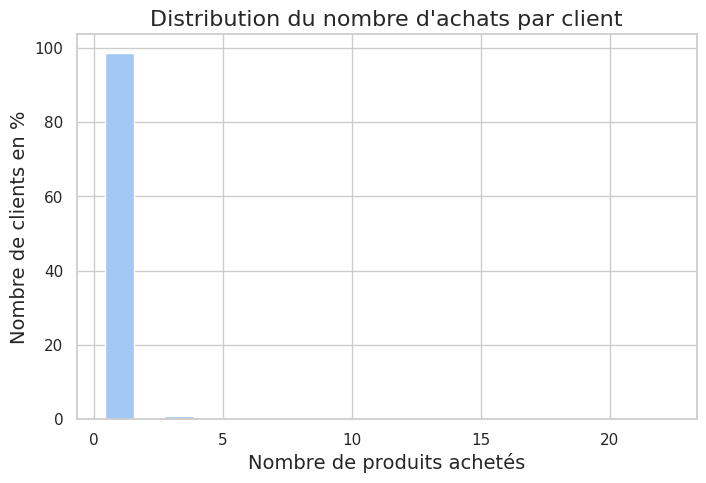

In [370]:
# customer_order: Table contenant les clients et les commandes associées
customer_order = data_customers.set_index('customer_id').join(
    data_orders.set_index('customer_id'), how='inner')
customer_order['customer_id'] = customer_order.index
# customer_item: Table contenant les clients et les items achetés associés
customer_item = customer_order.set_index('order_id').join(
    data_items.set_index('order_id'), how='inner')
customer_item['order_id'] = customer_item.index
# customer_nb_items: Contient le nombre d'items achetés pour chaque client
customer_nb_items = customer_item.groupby('customer_unique_id').agg({'product_id': 'count'})['product_id']
# On renomme la colonne comme il faut
hist, bins = np.histogram(customer_nb_items)
plt.figure(figsize=(8, 5))
plt.bar(bins[:-1], 100*hist/hist.sum(), width=(bins[1]-bins[0])/2)
plt.title("Distribution du nombre d'achats par client", fontsize=16)
plt.ylabel("Nombre de clients en %", fontsize=14)
_ = plt.xlabel("Nombre de produits achetés", fontsize=14)

Nous constatons que la quasi totalité des client n'ont commandé qu'un seul produit. On ne pourra analyser la contingence des achats.

## Catégories des produits achetés

On va s'intéresser aux catégories dans lesquellles les clients dépensent le plus d'argent.

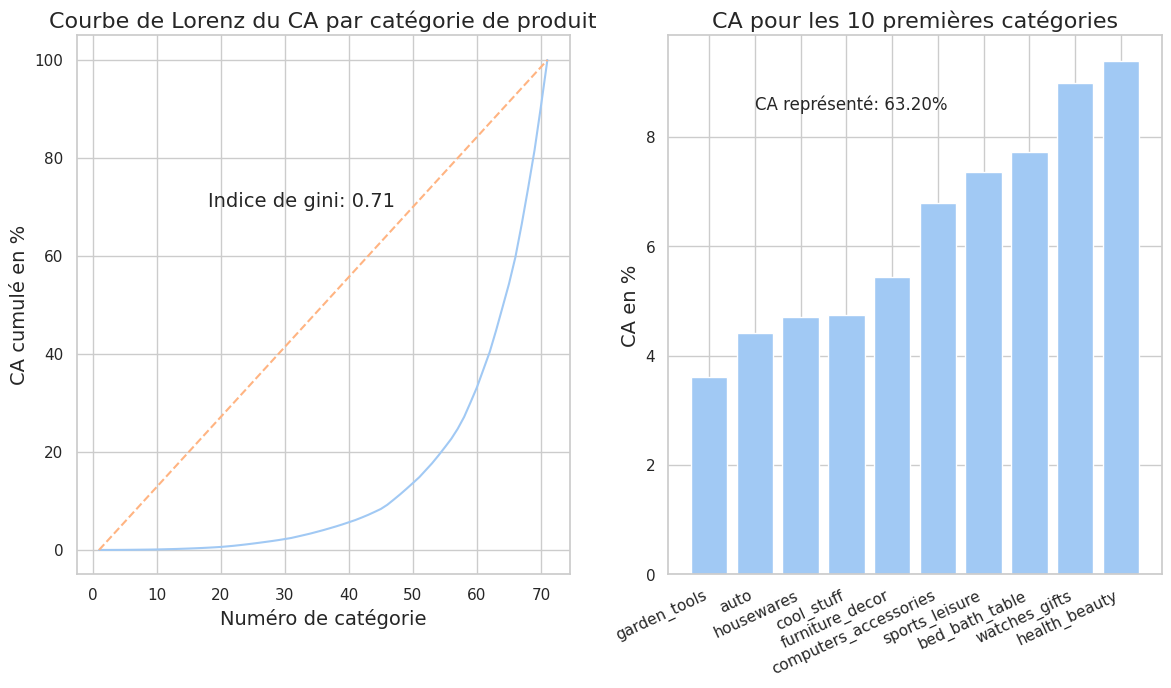

In [371]:
# data_items_detaild: Table des produits achetés enrichie avec les informations du produit (catégorie, dimensions...)
data_items_detaild = data_items.set_index('product_id').join(data_products.set_index('product_id'))
data_items_detaild['product_id'] = data_items_detaild.index
data_items_detaild = data_items_detaild.set_index('product_category_name').join(data_categories.set_index('product_category_name'))
# sales_categ: CA par catégorie de produit 
sales_categ = data_items_detaild.groupby('product_category_name_english').agg({'price':'sum'})['price'].copy()
sales_categ.sort_values(inplace=True, ascending=True)
# On calcule la courbe de lorenz du CA par catégorie
lorenz = 100*sales_categ.cumsum()/sales_categ.sum()
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].plot(np.arange(1, len(lorenz)+1), lorenz)
axs[0].plot([1, len(lorenz)], [0, 100], linestyle='--')
axs[0].set_title("Courbe de Lorenz du CA par catégorie de produit", fontsize=16)
axs[0].set_ylabel("CA cumulé en %", fontsize=14)
axs[0].set_xlabel("Numéro de catégorie", fontsize=14)
axs[0].text(18, 70,"Indice de gini: %.2f" % gini(sales_categ), fontsize=14)
# Les premières catégories
nb_categs = 10
sales_categ_first = sales_categ.iloc[-nb_categs:]
axs[1].bar(sales_categ_first.index, 100*sales_categ_first/sales_categ.sum())
axs[1].set_xticks(np.arange(len(sales_categ_first)))
axs[1].set_xticklabels(sales_categ_first.index, rotation=25, ha='right')
axs[1].set_ylabel("CA en %", fontsize=14)
axs[1].set_title("CA pour les %d premières catégories" % nb_categs, fontsize=16)
_ = axs[1].text(1, 8.5, "CA représenté: %.2f" % (100*sales_categ_first.sum()/sales_categ.sum()) + '%')

## Positions géographique des clients

### Données géographiques et démographiques

On charge également des bases de données complémentaires (indacteurs socioéconomiques, démographiques...) et des fichiers utiles, commes les shapefiles.

#### iso_states

In [372]:
# Chargement du fichier iso des codes des États
iso_states = pd.read_csv('./data/states_iso.csv')
iso_states.drop(columns=['Unnamed: 0'], inplace=True)
iso_states.columns = ['subdivision_category', 'state_iso', 'state_name', 'local_variant', 'language_code', 'romanization_system', 'parent_subdivision']
iso_states.drop(columns=['subdivision_category', 'local_variant', 'language_code', 'romanization_system', 'parent_subdivision'], inplace=True)
iso_states['state_iso'] = iso_states['state_iso'].map(lambda xx_code: xx_code[3:])
iso_states['state_name'] = iso_states['state_name'].map(format_str).copy()
iso_states.head()

,state_iso,state_name
0,AC,acre
1,AL,alagoas
2,AP,amapa
3,AM,amazonas
4,BA,bahia


#### city_pop

In [373]:
# Chargement de la table de la population par municipalité
city_pop = pd.read_excel('./data/POP2022_Municipios.xls')
city_pop.columns = city_pop.loc[0]
city_pop.drop(index=[0], inplace=True)
city_pop.dropna(inplace=True)
city_pop.columns = ['state_iso', 'state_code', 'city_code', 'city_name', 'population']
city_pop['city_code'] = city_pop['state_code'].astype(str) + city_pop['city_code'].astype(str)
city_pop.drop(columns=['state_code'], inplace=True)
# Formattage en entiers des nombres de populations
format_int = lambda x: x if isinstance(x, int) else int(re.sub('\(.*\)', '', x.replace('.', '')))
city_pop['population'] = city_pop['population'].map(format_int)
city_pop = city_pop.set_index('state_iso').join(iso_states.set_index('state_iso')[['state_name']])
city_pop['state_iso'] = city_pop.index
# Formattage des noms de municipalités
city_pop['city_name'] = city_pop['city_name'].map(format_str).copy()
city_pop.index = pd.Index(np.arange(len(city_pop)))
city_pop.head()

,city_code,city_name,population,state_name,state_iso
0,1200013,acrelandia,12707,acre,AC
1,1200054,assis brasil,8157,acre,AC
2,1200104,brasileia,25786,acre,AC
3,1200138,bujari,11962,acre,AC
4,1200179,capixaba,9737,acre,AC


#### territorial_div

In [374]:
# Divisions territoriales
territorial_div = pd.read_excel('./data/RELATORIO_DTB_BRASIL_DISTRITO.xls')
territorial_div = territorial_div[['Nome_UF', 'Nome_Município', 'Código Município Completo', 'Nome_Distrito', 'Código de Distrito Completo']]
territorial_div.columns = ['state_name', 'city_name', 'city_code', 'district_name', 'district_code']
for col in ['district_name', 'city_name', 'state_name']:
    territorial_div[col] = territorial_div[col].map(format_str).copy()
territorial_div.head()

,state_name,city_name,city_code,district_name,district_code
0,rondonia,alta floresta d'oeste,1100015,alta floresta d'oeste,110001505
1,rondonia,alta floresta d'oeste,1100015,filadelfia d'oeste,110001515
2,rondonia,alta floresta d'oeste,1100015,izidolandia,110001520
3,rondonia,alta floresta d'oeste,1100015,nova gease d'oeste,110001525
4,rondonia,alta floresta d'oeste,1100015,rolim de moura do guapore,110001530


In [375]:
data_customers.rename(columns={'customer_state': 'customer_state_iso'}, inplace=True)

On va ainsi compléter les informations géographiques des clients. Voici la table des clients avec le nom de l'État, et les codes de la municipalité et de la ville.

In [376]:
def evaluate_concentration_geo(pop_per_region, region_type, nb_first=10):
    pop_per_region.sort_values(inplace=True, ascending=True)
    # On calcule la courbe de lorenz
    lorenz = 100*pop_per_region.cumsum()/pop_per_region.sum()
    fig, axs = plt.subplots(1, 2, figsize=(14, 7))
    axs[0].plot(np.arange(1, len(lorenz)+1), lorenz)
    axs[0].plot([1, len(lorenz)], [0, 100], linestyle='--')
    axs[0].set_title("Courbe de Lorenz du nombre de clients par %s" % region_type, fontsize=16)
    axs[0].set_ylabel("Nombre de clients cumulé en %", fontsize=14)
    axs[0].set_xlabel("Numéro %s" % region_type, fontsize=14)
    axs[0].text(len(lorenz)/5, 70,"Indice de gini: %.2f" % gini(pop_per_region), fontsize=14)
    # Les premières catégories
    pop_per_region_first = pop_per_region.iloc[-nb_first:]
    pop_per_region_first_percent = 100*pop_per_region_first/pop_per_region.sum()
    axs[1].bar(pop_per_region_first.index.astype(str), pop_per_region_first_percent)
    axs[1].set_xticks(np.arange(len(pop_per_region_first)))
    axs[1].set_xticklabels(pop_per_region_first.index.astype(str), rotation=25, ha='right')
    axs[1].set_ylabel("Nombre de clients en %", fontsize=14)
    axs[1].set_title("Nombre de clients pour les %d premiers %s" % (nb_first, region_type), fontsize=16)
    _ = axs[1].text(1, pop_per_region_first_percent.max()*4/5, "Clients représentés: %.2f" % pop_per_region_first_percent.sum() + '%')

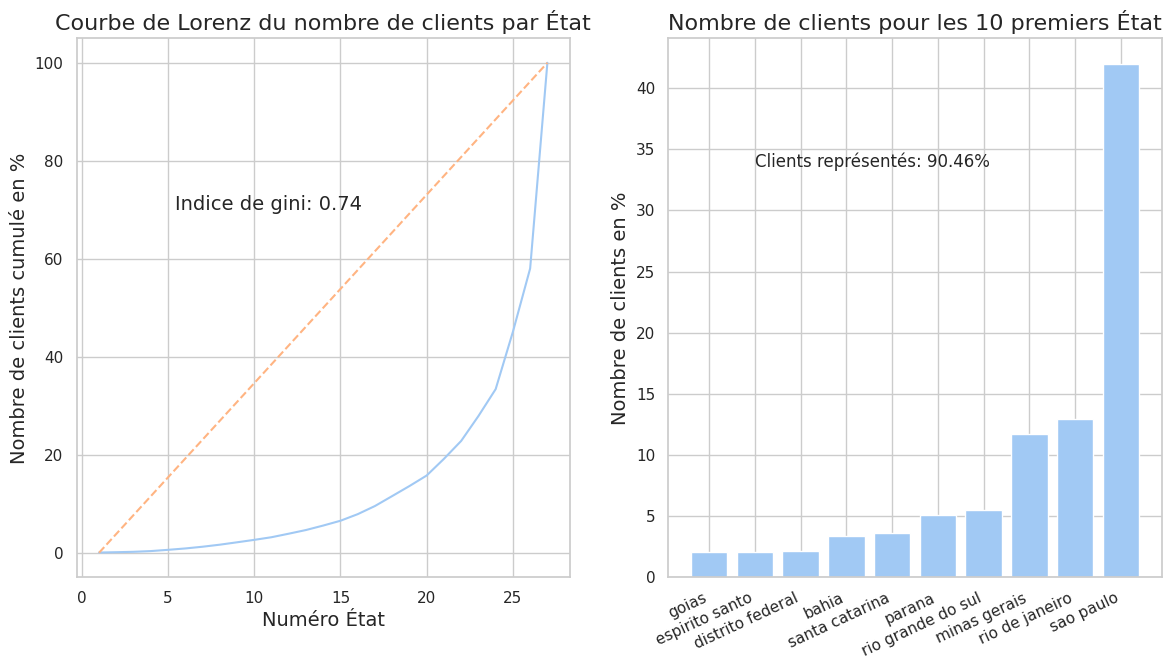

In [377]:
# On ajoute le nom de l'état à la table des client
data_customers = data_customers.set_index('customer_state_iso').join(iso_states.set_index('state_iso')[['state_name']])
data_customers['customer_state_iso'] = data_customers.index
# state_customers: Nombre de clients par État
state_customers = data_customers.groupby('state_name').agg({'customer_unique_id': 'count'})['customer_unique_id'].copy()
evaluate_concentration_geo(state_customers, 'État', nb_first=10)

On observe une concentration des clients dans les villes de Sao Paulo et Rio de Janeiro ainsi que dans les États associés.

On peut également s'intéresser au pourcentage de la population de l'État dans la clientèle.

In [378]:
def plot_shape(shp_file, id, ax, c='black', background_c=None, title=None):
    #plotting the graphical axes where map ploting will be done
    points = np.array(shp_file.shape(id).points)
    parts = list(shp_file.shape(id).parts) + [len(points)]
    for ind_part in range(len(parts)-1):
        #plotting using the derived coordinated stored in array created by numpy
        points_part = points[parts[ind_part]:parts[ind_part+1]]
        ax.plot(points_part[:, 0], points_part[:, 1], c=c, linewidth=2)
        if background_c is not None:
            ax.add_patch(Polygon(points_part, closed=True, color=background_c))
    ax.text(np.mean(points[:,0]), np.mean(points[:,1]), title, ha='center')

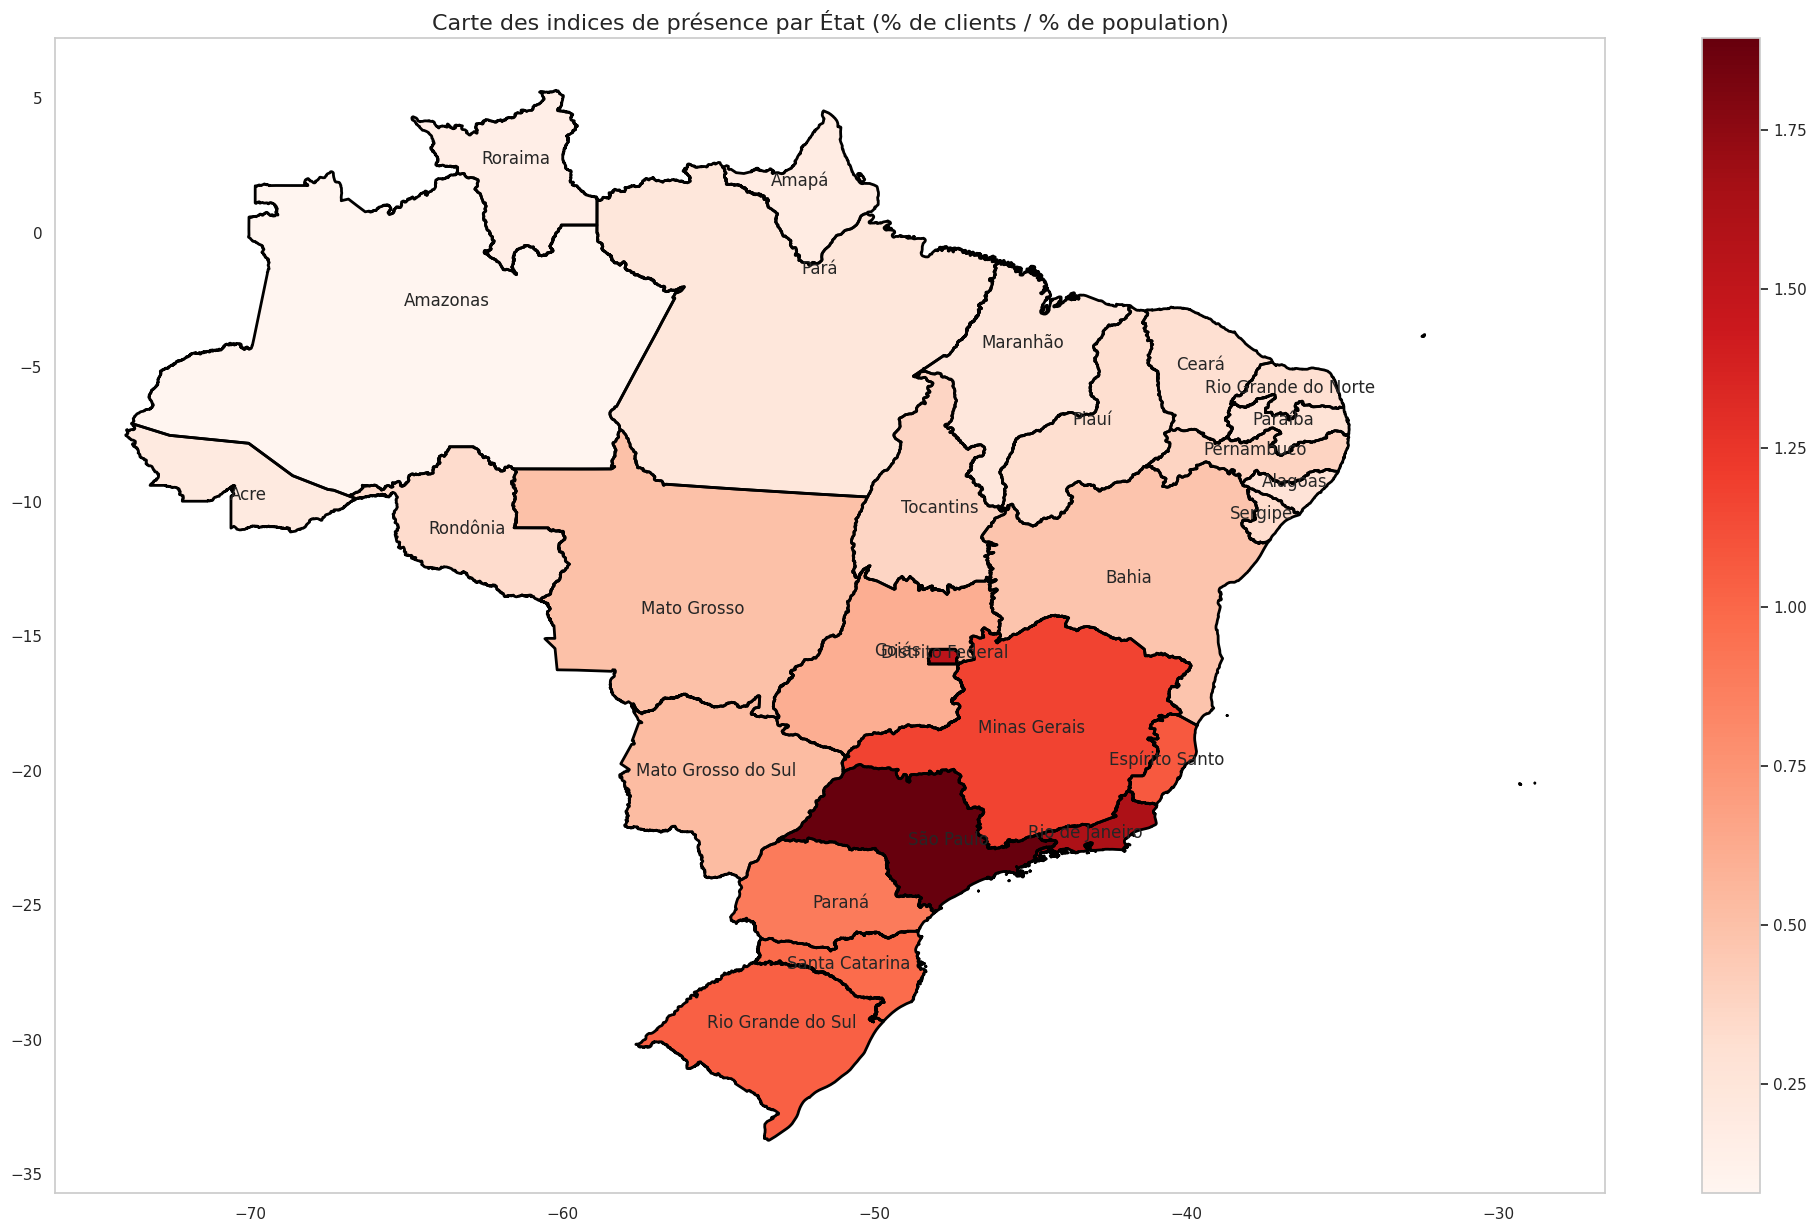

In [379]:
# state_pop: Population par État
state_pop = city_pop.groupby('state_name').agg({'population': 'sum'})['population']
state_pop_percent = 100*state_pop/state_pop.sum()
index_state = (100*state_customers/state_customers.sum()) / state_pop_percent
sns.set(style="whitegrid", palette="pastel", color_codes=True)
plt.figure(figsize=(25, 15))
ax = plt.axes()
ax.grid(False)
sm = ScalarMappable(Normalize(), plt.get_cmap('Reds'))
sm.set_array(index_state)
plt.colorbar(sm,ax=ax)
colors = sm.to_rgba(index_state)
for i in range(len(shp_file_states.shapes())):
    title = shp_file_states.record(i, fields=['ADM1_PT'])[0]
    ind_color = list(index_state.index).index(format_str(title))
    plot_shape(shp_file_states, i, ax, title=title, background_c=colors[ind_color])
_ = plt.title("Carte des indices de présence par État (% de clients / % de population)", fontsize=16)

# Indicator for Brazil States

The new indicators follow the recommendations of the United Nations and are based on a series of variables of the  2017-2018 Consumer Expenditure Survey (POF).
- RDFPC: Average Per capita Household Disposable Income
- IQPV: Multidimensional index for the loss of quality of life (the closer to 0 the smaller the loss, max=1)
- IDS: Index that measures the socio-economic performance. Incorporates the per capita household disposable income (RDFPC) and the losses of quality of life relative to six dimensions (Housing; Access to public utility services; Health and food; Education; Access to financial services and standard of living; Transportation and leisure)
    
On ajoute également l'indice de présence de l'entreprise dans l'État

In [380]:
socioeco_indices = pd.read_excel('./data/socioeconomic_indicators_states.xlsx')
socioeco_indices.loc[4][['Unnamed: 0', 'Unnamed: 1']] = socioeco_indices.loc[2][['Unnamed: 0', 'Unnamed: 1']]
socioeco_indices.columns = socioeco_indices.loc[4]
socioeco_indices.drop(index=[0, 1, 2, 3, 4, 5, 33, 34], columns=['B= Ln da média da RDFPC (3)', 'B*IPQV', 'IDS(B, IPQV ) '], inplace=True)
socioeco_indices.columns = ['state_name', 'IQPV', 'RDFPC', 'RDFCP*IQPV', 'IDS']
socioeco_indices['state_name'] = socioeco_indices['state_name'].map(format_str)
socioeco_indices = socioeco_indices.set_index('state_name')
socioeco_indices['olist_presece_index'] = index_state
socioeco_indices = socioeco_indices.astype(float)
socioeco_indices.head()

,IQPV,RDFPC,RDFCP*IQPV,IDS,olist_presece_index
state_name,,,,,
rondonia,0.193813,1192.685428,231.157388,961.528040,0.327004
acre,0.238332,1077.729472,256.856889,820.872583,0.203938
amazonas,0.216128,928.641961,200.705971,727.935990,0.078233
roraima,0.170686,1191.557442,203.382434,988.175008,0.151389
para,0.243516,845.384021,205.864270,639.519751,0.241260


In [381]:
c = socioeco_indices.corr().abs()
sol = (c.where(np.triu(np.ones(c.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
print("Corrélations entre les indicateurs socioéconomiques:\n%s" % sol)

Corrélations entre les indicateurs socioéconomiques:
RDFPC       IDS                    0.997930
IDS         olist_presece_index    0.844809
IQPV        IDS                    0.830691
RDFPC       olist_presece_index    0.829561
IQPV        RDFPC                  0.797918
            olist_presece_index    0.785860
RDFPC       RDFCP*IQPV             0.775274
RDFCP*IQPV  IDS                    0.733052
            olist_presece_index    0.476503
IQPV        RDFCP*IQPV             0.280486
dtype: float64


On déduit plusieurs choses de ces corrélations:
- Le RDFPC est fortement corrélé à l'IDS. On ne représentera que le RDFPC par la suite
- La présence de Olist est corrélée au RDFPC (revenus moyen par habitants)
- La perte de la qualité de vie (IQPV) est anti-corrélée au revenue moyen par habitant

# Exploration produits

On enrichi la table des produits avec toutes les informations qu'on peut obtenir sur ce produit.

In [382]:
# data_orders_review: On ajoute les notes des reviews à la table des commandes
data_orders_review = data_orders.set_index('order_id').join(data_items.set_index('order_id'), how='left')
data_orders_review.drop(columns=['order_status', 'order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date', 
                            'order_estimated_delivery_date', 'order_item_id', 'shipping_limit_date'], inplace=True)
data_orders_review = data_orders_review.join(data_reviews.set_index('order_id')[['review_score']])
# On renomme les catégories en anglais
data_products = data_products.set_index('product_category_name').join(data_categories.set_index('product_category_name'), how='left')
data_products.rename(columns={'product_category_name_english': 'product_category_name'}, inplace=True)
# On synthétise les features des dimensions
data_products['product_volume_cm3'] = data_products['product_length_cm']*data_products['product_height_cm']*data_products['product_width_cm']
data_products.drop(columns=['product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)
# On ajoute des données sur les produits
data_products2 = data_orders_review.groupby('product_id').agg({'price':'mean', 'review_score':'mean', 'seller_id': most_common})
data_products = data_products.set_index('product_id').join(data_products2)
data_products['product_id'] = data_products.index
data_products.head()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_category_name,product_volume_cm3,price,review_score,seller_id,product_id
product_id,,,,,,,,,,
07f01b6fcacc1b187a71e5074199db2d,39.0,430.0,1.0,16400.0,agro_industry_and_commerce,232848.0,57.0000,5.000,6481e96574816ead57975da2c0f6d80d,07f01b6fcacc1b187a71e5074199db2d
613d093272cb8f74f25a01e430155a6a,39.0,326.0,1.0,1050.0,agro_industry_and_commerce,60762.0,29.5000,5.000,6481e96574816ead57975da2c0f6d80d,613d093272cb8f74f25a01e430155a6a
980ecbcc15fe174ec1e5757c4d75b1bf,48.0,157.0,1.0,250.0,agro_industry_and_commerce,510.0,24.6875,4.625,e59aa562b9f8076dd550fcddf0e73491,980ecbcc15fe174ec1e5757c4d75b1bf
ba1d7e7ee1f055d252a2faa8ea3cea9b,59.0,693.0,6.0,1900.0,agro_industry_and_commerce,27000.0,109.9000,5.000,0ed6ce5d87fd9c69eaacaeb778d67235,ba1d7e7ee1f055d252a2faa8ea3cea9b
137ace556a03792cdc43f91ec621426d,48.0,1268.0,1.0,550.0,agro_industry_and_commerce,3344.0,23.9000,1.000,88ef59b51bdaa941d10a853429f2b6ce,137ace556a03792cdc43f91ec621426d


On construit la table des vendeurs, avec leurs ventes, le nombre de produits mis en vente, et leur note moyenne.

In [383]:
aux = data_items.set_index('order_id').join(data_orders_review[['review_score']], how='left').groupby('seller_id').agg({'review_score':'mean'})
data_sellers_products = data_items.groupby('seller_id').agg({'price': ['sum','mean'], 'product_id': 'count'})
data_sellers_products = data_sellers_products.join(aux, how='left')
data_sellers_products.columns = ['seller_turnover', 'seller_mean_price', 'seller_nb_products', 'seller_review_score']
data_sellers_products.head()

/tmp/ipykernel_5652/2244444887.py:3: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  data_sellers_products = data_sellers_products.join(aux, how='left')


,seller_turnover,seller_mean_price,seller_nb_products,seller_review_score
seller_id,,,,
0015a82c2db000af6aaaf3ae2ecb0532,2685.00,895.000000,3,3.666667
001cca7ae9ae17fb1caed9dfb1094831,25080.03,104.937364,239,3.700880
001e6ad469a905060d959994f1b41e4f,250.00,250.000000,1,1.000000
002100f778ceb8431b7a1020ff7ab48f,1234.50,22.445455,55,4.076923
003554e2dce176b5555353e4f3555ac8,120.00,120.000000,1,5.000000


On associe les données des vendeurs à celle des produits, et on analyse les corrélations entre ces données.

In [384]:
data_products = pd.merge(data_products, data_sellers_products, how='left', left_on='seller_id', right_on='seller_id')
data_products.head()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_category_name,product_volume_cm3,price,review_score,seller_id,product_id,seller_turnover,seller_mean_price,seller_nb_products,seller_review_score
0,39.0,430.0,1.0,16400.0,agro_industry_and_commerce,232848.0,57.0000,5.000,6481e96574816ead57975da2c0f6d80d,07f01b6fcacc1b187a71e5074199db2d,3324.90,77.323256,43,4.000000
1,39.0,326.0,1.0,1050.0,agro_industry_and_commerce,60762.0,29.5000,5.000,6481e96574816ead57975da2c0f6d80d,613d093272cb8f74f25a01e430155a6a,3324.90,77.323256,43,4.000000
2,48.0,157.0,1.0,250.0,agro_industry_and_commerce,510.0,24.6875,4.625,e59aa562b9f8076dd550fcddf0e73491,980ecbcc15fe174ec1e5757c4d75b1bf,31574.30,375.884524,84,4.386364
3,59.0,693.0,6.0,1900.0,agro_industry_and_commerce,27000.0,109.9000,5.000,0ed6ce5d87fd9c69eaacaeb778d67235,ba1d7e7ee1f055d252a2faa8ea3cea9b,2141.42,49.800465,43,4.404762
4,48.0,1268.0,1.0,550.0,agro_industry_and_commerce,3344.0,23.9000,1.000,88ef59b51bdaa941d10a853429f2b6ce,137ace556a03792cdc43f91ec621426d,252.90,126.450000,2,2.000000


In [385]:
c = data_products.corr().abs()
sol = (c.where(np.triu(np.ones(c.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
sol.iloc[:10]

/tmp/ipykernel_5652/3469496116.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = data_products.corr().abs()


seller_turnover             seller_nb_products     0.828147
product_weight_g            product_volume_cm3     0.803005
price                       seller_mean_price      0.740650
product_weight_g            price                  0.347629
review_score                seller_review_score    0.346785
product_volume_cm3          price                  0.304517
product_weight_g            seller_mean_price      0.248242
product_volume_cm3          seller_mean_price      0.223969
product_description_lenght  price                  0.192650
                            seller_mean_price      0.160602
dtype: float64

# Profils clients

On commence par ajouter les features de l'État de chaque client.

In [386]:
profile_customers = data_customers.copy()
profile_customers = profile_customers.set_index('state_name').join(socioeco_indices, how='left')
profile_customers['state_name'] = profile_customers.index
profile_customers.index = pd.Index(np.arange(len(profile_customers)))
profile_customers = pd.merge(profile_customers, data_location_zip, left_on='customer_zip_code_prefix', right_index=True, how='inner', validate='m:1')
profile_customers.drop(columns=['customer_city', 'customer_state_iso', 'customer_id', 'customer_zip_code_prefix'], inplace=True)
profile_customers.drop_duplicates(subset='customer_unique_id', inplace=True)
profile_customers = profile_customers.set_index('customer_unique_id')
profile_customers.head()

,IQPV,RDFPC,RDFCP*IQPV,IDS,olist_presece_index,state_name,geolocation_lat,geolocation_lng
customer_unique_id,,,,,,,,
544d0f13064dc42b8f6957cf43fa5cad,0.238332,1077.729472,256.856889,820.872583,0.203938,acre,-9.956046,-67.828671
b1cf91f7efd99001549d2eafa05c66c1,0.238332,1077.729472,256.856889,820.872583,0.203938,acre,-9.956046,-67.828671
8c792a4fb7f5d708257abf55fa899ce8,0.238332,1077.729472,256.856889,820.872583,0.203938,acre,-9.956046,-67.828671
5f8f12098427d3cbb37e9dcf269bb53c,0.238332,1077.729472,256.856889,820.872583,0.203938,acre,-9.956046,-67.828671
c73db85789b600b05c503d21441940f9,0.238332,1077.729472,256.856889,820.872583,0.203938,acre,-9.956046,-67.828671


On crée la table contenant les informations du produit type pour chaque client

In [387]:
from datetime import date
def str_to_date(str_datetime):
    if not isinstance(str_datetime, str):
        return str_datetime
    str_date = str_datetime.split(' ')[0]
    return date(*[int(x) for x in str_date.split('-')])
data_orders.order_approved_at = data_orders.order_approved_at.map(str_to_date)
data_orders.dropna(subset=['order_approved_at'], inplace=True)



In [388]:
customer_product = pd.merge(data_items[['order_id', 'product_id']], data_orders[['customer_id', 'order_id', 'order_approved_at']], on='order_id', how='inner', validate='m:1')
customer_product = pd.merge(data_customers[['customer_id', 'customer_unique_id']], customer_product, on='customer_id', how='inner', validate='1:m')
customer_product = pd.merge(data_products, customer_product[['customer_unique_id', 'product_id', 'order_approved_at']], on='product_id', validate='1:m')
agg_dict = {
    'product_name_lenght': 'mean',
    'product_description_lenght': 'mean',
    'product_photos_qty': 'mean',
    'product_weight_g': 'mean',
    'product_category_name': most_common,
    'product_volume_cm3': 'mean',
    'price': 'mean',
    'product_id': 'count',
    'review_score': 'mean',
    'seller_id': most_common,
    'seller_turnover': 'mean',
    'seller_mean_price': 'mean',
    'seller_nb_products': 'mean',
    'seller_review_score': 'mean',
    'order_approved_at': 'max',
}
customer_product = customer_product.groupby('customer_unique_id').agg(agg_dict)
customer_product.rename(columns={'order_approved_at': 'date_last_purchase', 'product_id': 'nb_purchase'}, inplace=True)
customer_product.head()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_category_name,product_volume_cm3,price,nb_purchase,review_score,seller_id,seller_turnover,seller_mean_price,seller_nb_products,seller_review_score,date_last_purchase
customer_unique_id,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,60.0,236.0,1.0,1500.0,bed_bath_table,7616.0,109.382759,1,4.206897,da8622b14eb17ae2831f4ac5b9dab84a,160236.57,103.311779,1551.0,3.814948,2018-05-10
0000b849f77a49e4a4ce2b2a4ca5be3f,56.0,635.0,1.0,375.0,health_beauty,5148.0,19.042857,1,4.714286,138dbe45fc62f1e244378131a6801526,1125.56,19.406207,58.0,3.537634,2018-05-07
0000f46a3911fa3c0805444483337064,49.0,177.0,3.0,1500.0,stationery,43750.0,73.000000,1,4.600000,3d871de0142ce09b7081e2b9d1733cb1,94914.20,82.749956,1147.0,4.019040,2017-03-10
0000f6ccb0745a6a4b88665a16c9f078,43.0,1741.0,5.0,150.0,telephony,1045.0,27.990000,1,4.666667,ef506c96320abeedfb894c34db06f478,9771.43,28.739500,340.0,3.828877,2017-10-12
0004aac84e0df4da2b147fca70cf8255,58.0,794.0,3.0,6050.0,telephony,528.0,180.000000,1,5.000000,70a12e78e608ac31179aea7f8422044b,30858.53,94.080884,328.0,3.713499,2017-11-14


On réuni la table des données géographiques/sociologiques et celle des produits/vendeurs pour avoir la table des features client.

In [389]:
profile_customers = profile_customers.join(customer_product, validate='1:1', how='inner')
profile_customers.head()

,IQPV,RDFPC,RDFCP*IQPV,IDS,olist_presece_index,state_name,geolocation_lat,geolocation_lng,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_category_name,product_volume_cm3,price,nb_purchase,review_score,seller_id,seller_turnover,seller_mean_price,seller_nb_products,seller_review_score,date_last_purchase
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,
544d0f13064dc42b8f6957cf43fa5cad,0.238332,1077.729472,256.856889,820.872583,0.203938,acre,-9.956046,-67.828671,55.0,1626.0,1.0,175.0,market_place,3230.0,62.816667,1,3.750000,aae3bfea055532c57fb453ed3ec80b30,3057.92,61.158400,50.0,3.425926,2017-08-17
b1cf91f7efd99001549d2eafa05c66c1,0.238332,1077.729472,256.856889,820.872583,0.203938,acre,-9.956046,-67.828671,54.0,995.0,1.0,4475.0,cool_stuff,32736.0,99.254124,1,4.270833,7a67c85e85bb2ce8582c35f2203ad736,141745.53,121.046567,1171.0,4.167216,2017-08-04
8c792a4fb7f5d708257abf55fa899ce8,0.238332,1077.729472,256.856889,820.872583,0.203938,acre,-9.956046,-67.828671,57.0,1682.0,1.0,7200.0,stationery,32637.0,332.933333,1,4.333333,41c9d3997dd3c072c31139dc5bb5761f,998.80,332.933333,3.0,4.333333,2017-03-06
5f8f12098427d3cbb37e9dcf269bb53c,0.238332,1077.729472,256.856889,820.872583,0.203938,acre,-9.956046,-67.828671,55.0,569.0,5.0,250.0,watches_gifts,352.0,29.000000,1,4.272727,6560211a19b47992c3666cc44a7e94c0,123304.83,60.651663,2033.0,3.846465,2018-04-13
c73db85789b600b05c503d21441940f9,0.238332,1077.729472,256.856889,820.872583,0.203938,acre,-9.956046,-67.828671,58.0,672.0,3.0,350.0,auto,2040.0,70.990000,1,4.000000,c9c7905cffc4ef9ff9f113554423e671,10657.18,76.670360,139.0,4.212644,2017-10-03


On ajoute la localisation du vendeur le plus sollicité pour chaque client, ainsi que les indicateurs socioéconomique de son État.

In [390]:
data_sellers = pd.merge(data_sellers, iso_states, left_on='seller_state', right_on='state_iso', how='inner', validate='m:1')
data_sellers.drop(columns='state_iso', inplace=True)
data_sellers.rename(columns={'state_name': 'seller_state_name', 'seller_state': 'seller_state_iso'}, inplace=True)
data_sellers = pd.merge(data_sellers, socioeco_indices, left_on='seller_state_name', right_index=True, how='inner', validate='m:1')
data_sellers = pd.merge(data_sellers, data_location_zip, left_on='seller_zip_code_prefix', right_index=True, how='inner', validate='m:1')
data_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state_iso,seller_state_name,IQPV,RDFPC,RDFCP*IQPV,IDS,olist_presece_index,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,sao paulo,0.11272,2302.161899,259.500702,2042.661197,1.89495,-22.893317,-47.060596
1077,e0eabded302882513ced4ea3eb0c7059,13023,campinas,SP,sao paulo,0.11272,2302.161899,259.500702,2042.661197,1.89495,-22.893317,-47.060596
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,sao paulo,0.11272,2302.161899,259.500702,2042.661197,1.89495,-22.383059,-46.948034
2,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,sao paulo,0.11272,2302.161899,259.500702,2042.661197,1.89495,-23.657064,-46.612668
3,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,sao paulo,0.11272,2302.161899,259.500702,2042.661197,1.89495,-22.964518,-46.534257


On ajoute les données du vendeur le plus sollicité par chaque client à son profil. On notera qu'on ne connait pas la position de certains vendeurs, nous ignorerons les profils qui les référencent.

In [391]:
profile_customers = pd.merge(profile_customers, data_sellers.drop(columns=['seller_zip_code_prefix', 'seller_city', 'seller_state_iso']), on='seller_id', suffixes=('', '_seller'))
profile_customers.head()

,IQPV,RDFPC,RDFCP*IQPV,IDS,olist_presece_index,state_name,geolocation_lat,geolocation_lng,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_category_name,product_volume_cm3,price,nb_purchase,review_score,seller_id,seller_turnover,seller_mean_price,seller_nb_products,seller_review_score,date_last_purchase,seller_zip_code_prefix,seller_city,seller_state_iso,seller_state_name,IQPV_seller,RDFPC_seller,RDFCP*IQPV_seller,IDS_seller,olist_presece_index_seller,geolocation_lat_seller,geolocation_lng_seller
0,0.238332,1077.729472,256.856889,820.872583,0.203938,acre,-9.956046,-67.828671,55.0,1626.0,1.0,175.0,market_place,3230.0,62.816667,1,3.750000,aae3bfea055532c57fb453ed3ec80b30,3057.92,61.1584,50.0,3.425926,2017-08-17,9271,santo andre,SP,sao paulo,0.11272,2302.161899,259.500702,2042.661197,1.89495,-23.643262,-46.499585
1,0.216128,928.641961,200.705971,727.935990,0.078233,amazonas,-3.091239,-59.956446,63.0,1652.0,3.0,200.0,market_place,1320.0,111.386667,1,3.666667,aae3bfea055532c57fb453ed3ec80b30,3057.92,61.1584,50.0,3.425926,2017-11-28,9271,santo andre,SP,sao paulo,0.11272,2302.161899,259.500702,2042.661197,1.89495,-23.643262,-46.499585
2,0.199867,1219.988331,243.835735,976.152597,0.481712,bahia,-12.256133,-38.960452,55.0,1626.0,1.0,175.0,market_place,3230.0,62.816667,1,3.750000,aae3bfea055532c57fb453ed3ec80b30,3057.92,61.1584,50.0,3.425926,2017-05-03,9271,santo andre,SP,sao paulo,0.11272,2302.161899,259.500702,2042.661197,1.89495,-23.643262,-46.499585
3,0.199867,1219.988331,243.835735,976.152597,0.481712,bahia,-16.381853,-39.304253,63.0,937.0,2.0,200.0,market_place,1024.0,28.990000,1,3.166667,aae3bfea055532c57fb453ed3ec80b30,3057.92,61.1584,50.0,3.425926,2017-10-26,9271,santo andre,SP,sao paulo,0.11272,2302.161899,259.500702,2042.661197,1.89495,-23.643262,-46.499585
4,0.188652,1026.974764,193.740576,833.234188,0.312333,ceara,-4.132691,-38.241740,55.0,1626.0,1.0,175.0,market_place,3230.0,62.816667,1,3.750000,aae3bfea055532c57fb453ed3ec80b30,3057.92,61.1584,50.0,3.425926,2017-08-29,9271,santo andre,SP,sao paulo,0.11272,2302.161899,259.500702,2042.661197,1.89495,-23.643262,-46.499585


On remplace les coordonnées du client et du vendeur par la distance entre les deux.

In [392]:
dist_lat = (profile_customers.geolocation_lat - profile_customers.geolocation_lat_seller)**2
dist_lng = (profile_customers.geolocation_lng - profile_customers.geolocation_lng_seller)**2
profile_customers['distance_seller'] = np.sqrt(dist_lat+dist_lng)
profile_customers.drop(columns = ['geolocation_lat', 'geolocation_lat_seller', 'geolocation_lng', 'geolocation_lng_seller'], inplace=True)
profile_customers.head()

,IQPV,RDFPC,RDFCP*IQPV,IDS,olist_presece_index,state_name,geolocation_lat,geolocation_lng,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_category_name,product_volume_cm3,price,nb_purchase,review_score,seller_id,seller_turnover,seller_mean_price,seller_nb_products,seller_review_score,date_last_purchase,seller_zip_code_prefix,seller_city,seller_state_iso,seller_state_name,IQPV_seller,RDFPC_seller,RDFCP*IQPV_seller,IDS_seller,olist_presece_index_seller,geolocation_lat_seller,geolocation_lng_seller,distance_seller
0,0.238332,1077.729472,256.856889,820.872583,0.203938,acre,-9.956046,-67.828671,55.0,1626.0,1.0,175.0,market_place,3230.0,62.816667,1,3.750000,aae3bfea055532c57fb453ed3ec80b30,3057.92,61.1584,50.0,3.425926,2017-08-17,9271,santo andre,SP,sao paulo,0.11272,2302.161899,259.500702,2042.661197,1.89495,-23.643262,-46.499585,25.343043
1,0.216128,928.641961,200.705971,727.935990,0.078233,amazonas,-3.091239,-59.956446,63.0,1652.0,3.0,200.0,market_place,1320.0,111.386667,1,3.666667,aae3bfea055532c57fb453ed3ec80b30,3057.92,61.1584,50.0,3.425926,2017-11-28,9271,santo andre,SP,sao paulo,0.11272,2302.161899,259.500702,2042.661197,1.89495,-23.643262,-46.499585,24.565683
2,0.199867,1219.988331,243.835735,976.152597,0.481712,bahia,-12.256133,-38.960452,55.0,1626.0,1.0,175.0,market_place,3230.0,62.816667,1,3.750000,aae3bfea055532c57fb453ed3ec80b30,3057.92,61.1584,50.0,3.425926,2017-05-03,9271,santo andre,SP,sao paulo,0.11272,2302.161899,259.500702,2042.661197,1.89495,-23.643262,-46.499585,13.656692
3,0.199867,1219.988331,243.835735,976.152597,0.481712,bahia,-16.381853,-39.304253,63.0,937.0,2.0,200.0,market_place,1024.0,28.990000,1,3.166667,aae3bfea055532c57fb453ed3ec80b30,3057.92,61.1584,50.0,3.425926,2017-10-26,9271,santo andre,SP,sao paulo,0.11272,2302.161899,259.500702,2042.661197,1.89495,-23.643262,-46.499585,10.222566
4,0.188652,1026.974764,193.740576,833.234188,0.312333,ceara,-4.132691,-38.241740,55.0,1626.0,1.0,175.0,market_place,3230.0,62.816667,1,3.750000,aae3bfea055532c57fb453ed3ec80b30,3057.92,61.1584,50.0,3.425926,2017-08-29,9271,santo andre,SP,sao paulo,0.11272,2302.161899,259.500702,2042.661197,1.89495,-23.643262,-46.499585,21.186184


On remplace la date de la dernière commande par client par la récence de l'achat par rapport à l'achat le plus récent en général.

In [398]:
most_recent = max(profile_customers.date_last_purchase)
profile_customers['purchase_recency'] = (most_recent - profile_customers.date_last_purchase).map(lambda dt: dt.days)
profile_customers.drop(columns=['date_last_purchase'], inplace=True)

In [ ]:
profile_customers.to_csv('profile_customers.csv', index=False)